In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
data_path = "../Data/parlay_data_sample_v1_07March24.csv"
data = pd.read_csv(data_path, low_memory=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 90 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   loan_id                               100000 non-null  int64  
 1   period_start                          100000 non-null  object 
 2   probability_of_default                100000 non-null  object 
 3   loss_given_default                    100000 non-null  object 
 4   expected_loss                         100000 non-null  object 
 5   lumos_score                           100000 non-null  int64  
 6   rate_type                             100000 non-null  object 
 7   franchise                             100000 non-null  bool   
 8   franchise_name                        4410 non-null    object 
 9   borrstate                             100000 non-null  object 
 10  businesstype                          100000 non-null  object 
 11  b

In [16]:
df = data[data.columns[:50]]
explanable_features = data[data.columns[50:]]
explanable_features

,EXPLANATION_1_FEATURE_NAME,EXPLANATION_1_STRENGTH,EXPLANATION_1_ACTUAL_VALUE,EXPLANATION_1_QUALITATIVE_STRENGTH,EXPLANATION_2_FEATURE_NAME,EXPLANATION_2_STRENGTH,EXPLANATION_2_ACTUAL_VALUE,EXPLANATION_2_QUALITATIVE_STRENGTH,EXPLANATION_3_FEATURE_NAME,EXPLANATION_3_STRENGTH,...,EXPLANATION_8_ACTUAL_VALUE,EXPLANATION_8_QUALITATIVE_STRENGTH,EXPLANATION_9_FEATURE_NAME,EXPLANATION_9_STRENGTH,EXPLANATION_9_ACTUAL_VALUE,EXPLANATION_9_QUALITATIVE_STRENGTH,EXPLANATION_10_FEATURE_NAME,EXPLANATION_10_STRENGTH,EXPLANATION_10_ACTUAL_VALUE,EXPLANATION_10_QUALITATIVE_STRENGTH
0,business_type,-0.165458,'EXISTING BUSINESS',--,borrstate,0.129951,'KS',++,t10y2y,-0.124901,...,'7.1',++,state_labor_force,0.079548,'1489001.0',++,t10yie,-0.078435,'1.55',--
1,loan_mean_fico,-0.255019,'764.5',---,business_type,0.239443,'NEW BUSINESS',+++,loan_max_fico,-0.199095,...,'IL',+,borr_count,-0.047088,'2.0',-,t10yie,-0.045048,'1.61',-
2,loan_max_fico,0.264952,'689.0',+++,loan_mean_fico,0.202938,'689.0',++,business_type,0.139876,...,'4a',++,county_employment,-0.074971,'29960.0',--,t10yie,-0.066798,'1.63',--
3,t10y2y,0.180264,'2.71',++,loan_min_fico,-0.119959,'701.0',--,bankruptcy,-0.118594,...,'V',++,vix_change,0.063983,'-45.8',++,loan_max_fico,-0.056703,'732.0',--
4,loan_max_fico,0.311784,'734.0',+++,state_civilian_labor_population,-0.175416,'3.0994913E7',--,loan_min_fico,0.152704,...,'F',--,county_employment,0.102569,'1573536.0',++,empoyessexistingqty,0.097354,'1.0',++
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,loan_mean_fico,-0.387256,'804.0',--,loan_max_fico,-0.363487,'819.0',--,loan_min_fico,-0.333787,...,'N',--,business_type,-0.093073,'EXISTING BUSINESS',-,lawsuit,-0.088729,'N',-
99996,loan_max_fico,0.158760,'644.0',++,naics_5,0.151666,'54161a',++,t10y2y,0.146152,...,'9.0',++,vix,0.097909,'30.69',++,state_unemployment_rate,0.091158,'8.3',++
99997,loan_max_fico,0.262102,'689.0',+++,loan_mean_fico,0.194990,'689.0',++,borrstate,-0.171402,...,'1.68',++,borr_count,0.061872,'1.0',++,lawsuit,0.046045,'N',+
99998,t10y2y,-0.201739,'0.47',---,business_type,0.124063,'NEW BUSINESS',++,borrstate,-0.123552,...,'722.0',++,state_labor_force,-0.064545,'3777086.0',--,expected_12mth_inflation_rate,-0.057594,'2.7',--


### Preprocessing
---
- Fixing dtypes
- Looking for any potential outliers ( there should be any considering that this is a simulated dataset ) 

In [21]:
df.head(10)

,loan_id,period_start,probability_of_default,loss_given_default,expected_loss,lumos_score,rate_type,franchise,franchise_name,borrstate,...,state_unemployment_rate,county_unemployment,state_unemployment,county_employment,state_employment,county_labor_force,state_labor_force,state_civilian_labor_population,state_employment_pop_ratio,state_labor_force_participation_rate
0,0,7/31/20,1.38%,18.39%,0.25%,100,F,False,NaN,KS,...,7.1,20696.0,105788.0,323149.0,1383213.0,343845.0,1489001.0,2247710.0,61.5,66.2
1,1,11/30/19,1.83%,30.18%,0.55%,94,V,False,NaN,IL,...,3.4,13875.0,221403.0,491661.0,6341422.0,505536.0,6562825.0,10124996.0,62.6,64.8
2,2,8/31/15,5.05%,66.34%,3.35%,81,V,False,NaN,CO,...,3.7,1130.0,104227.0,29960.0,2736370.0,31090.0,2840597.0,4237868.0,64.6,67.0
3,3,12/31/09,3.92%,42.93%,1.68%,86,V,False,NaN,CT,...,8.6,42534.0,161898.0,424146.0,1730674.0,466680.0,1892572.0,2754731.0,62.8,68.7
4,4,10/31/18,2.96%,47.49%,1.41%,88,F,False,NaN,CA,...,3.9,45641.0,759367.0,1573536.0,18567776.0,1619177.0,19327143.0,30994913.0,59.9,62.4
5,5,7/31/13,4.76%,53.80%,2.56%,83,V,False,NaN,AZ,...,8.4,137827.0,257522.0,1795190.0,2822419.0,1933017.0,3079941.0,5079772.0,55.6,60.6
6,6,2/28/14,5.37%,58.07%,3.12%,82,V,False,NaN,NY,...,7.4,32634.0,701349.0,420081.0,8827151.0,452715.0,9528500.0,15671846.0,56.3,60.8
7,7,4/30/16,1.42%,53.32%,0.76%,92,F,False,NaN,CO,...,3.5,185.0,99452.0,5447.0,2771118.0,5632.0,2870570.0,4297576.0,64.5,66.8
8,8,3/31/16,0.54%,40.37%,0.22%,100,V,False,NaN,MD,...,4.7,21192.0,146050.0,419771.0,2986754.0,440963.0,3132804.0,4708745.0,63.4,66.5
9,9,9/30/20,1.18%,30.31%,0.36%,98,V,False,NaN,CA,...,11.9,164732.0,2241617.0,1353927.0,16667569.0,1518659.0,18909186.0,31097702.0,53.6,60.8


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   loan_id                               100000 non-null  int64  
 1   period_start                          100000 non-null  object 
 2   probability_of_default                100000 non-null  object 
 3   loss_given_default                    100000 non-null  object 
 4   expected_loss                         100000 non-null  object 
 5   lumos_score                           100000 non-null  int64  
 6   rate_type                             100000 non-null  object 
 7   franchise                             100000 non-null  bool   
 8   franchise_name                        4410 non-null    object 
 9   borrstate                             100000 non-null  object 
 10  businesstype                          100000 non-null  object 
 11  b

### probability_of_default
---
fixing the dtype by removing symbols

In [23]:
new_copy = df.copy(deep=True)

In [31]:
new_copy['probability_of_default'] = new_copy['probability_of_default'].apply(lambda x: float(x.strip("%")))

### expected_loss
---
fixing the dtype by removing symbols

In [33]:
new_copy['expected_loss'] = new_copy['expected_loss'].apply(lambda x: float(x.strip("%")))

### loss_given_default
---
fixing the dtype by removing symbols

In [35]:
new_copy['loss_given_default'] = new_copy['loss_given_default'].apply(lambda x: float(x.strip("%")))

### date to datetime object

In [38]:
new_copy['period_start'] = pd.to_datetime(new_copy['period_start'])

/var/folders/5r/pnlff12n2d55g65_tnn3b1pw0000gn/T/ipykernel_40356/1271724143.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_copy['period_start'] = pd.to_datetime(new_copy['period_start'])


In [49]:
new_copy

,loan_id,period_start,probability_of_default,loss_given_default,expected_loss,lumos_score,rate_type,franchise,franchise_name,borrstate,...,state_unemployment_rate,county_unemployment,state_unemployment,county_employment,state_employment,county_labor_force,state_labor_force,state_civilian_labor_population,state_employment_pop_ratio,state_labor_force_participation_rate
0,0,2020-07-31,1.38,18.39,0.25,100,F,False,NaN,KS,...,7.1,20696.0,105788.0,323149.0,1383213.0,343845.0,1489001.0,2247710.0,61.5,66.2
1,1,2019-11-30,1.83,30.18,0.55,94,V,False,NaN,IL,...,3.4,13875.0,221403.0,491661.0,6341422.0,505536.0,6562825.0,10124996.0,62.6,64.8
2,2,2015-08-31,5.05,66.34,3.35,81,V,False,NaN,CO,...,3.7,1130.0,104227.0,29960.0,2736370.0,31090.0,2840597.0,4237868.0,64.6,67.0
3,3,2009-12-31,3.92,42.93,1.68,86,V,False,NaN,CT,...,8.6,42534.0,161898.0,424146.0,1730674.0,466680.0,1892572.0,2754731.0,62.8,68.7
4,4,2018-10-31,2.96,47.49,1.41,88,F,False,NaN,CA,...,3.9,45641.0,759367.0,1573536.0,18567776.0,1619177.0,19327143.0,30994913.0,59.9,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19918,2012-06-30,0.57,74.76,0.43,96,V,False,NaN,CA,...,10.3,38225.0,1904599.0,396006.0,16540083.0,434231.0,18444682.0,29249074.0,56.5,63.1
99996,19919,2009-10-31,15.09,92.74,13.99,70,V,False,NaN,TX,...,8.3,103834.0,1002810.0,1053617.0,11027843.0,1157451.0,12030653.0,18163851.0,60.7,66.2
99997,19920,2012-02-29,4.51,63.45,2.86,82,V,False,NaN,MA,...,7.4,30400.0,255995.0,363859.0,3214950.0,394259.0,3470945.0,5326196.0,60.4,65.2
99998,19921,2018-03-31,2.36,64.90,1.53,87,V,False,NaN,MA,...,4.2,12577.0,156828.0,266945.0,3620258.0,279522.0,3777086.0,5679819.0,63.7,66.5


<Axes: >

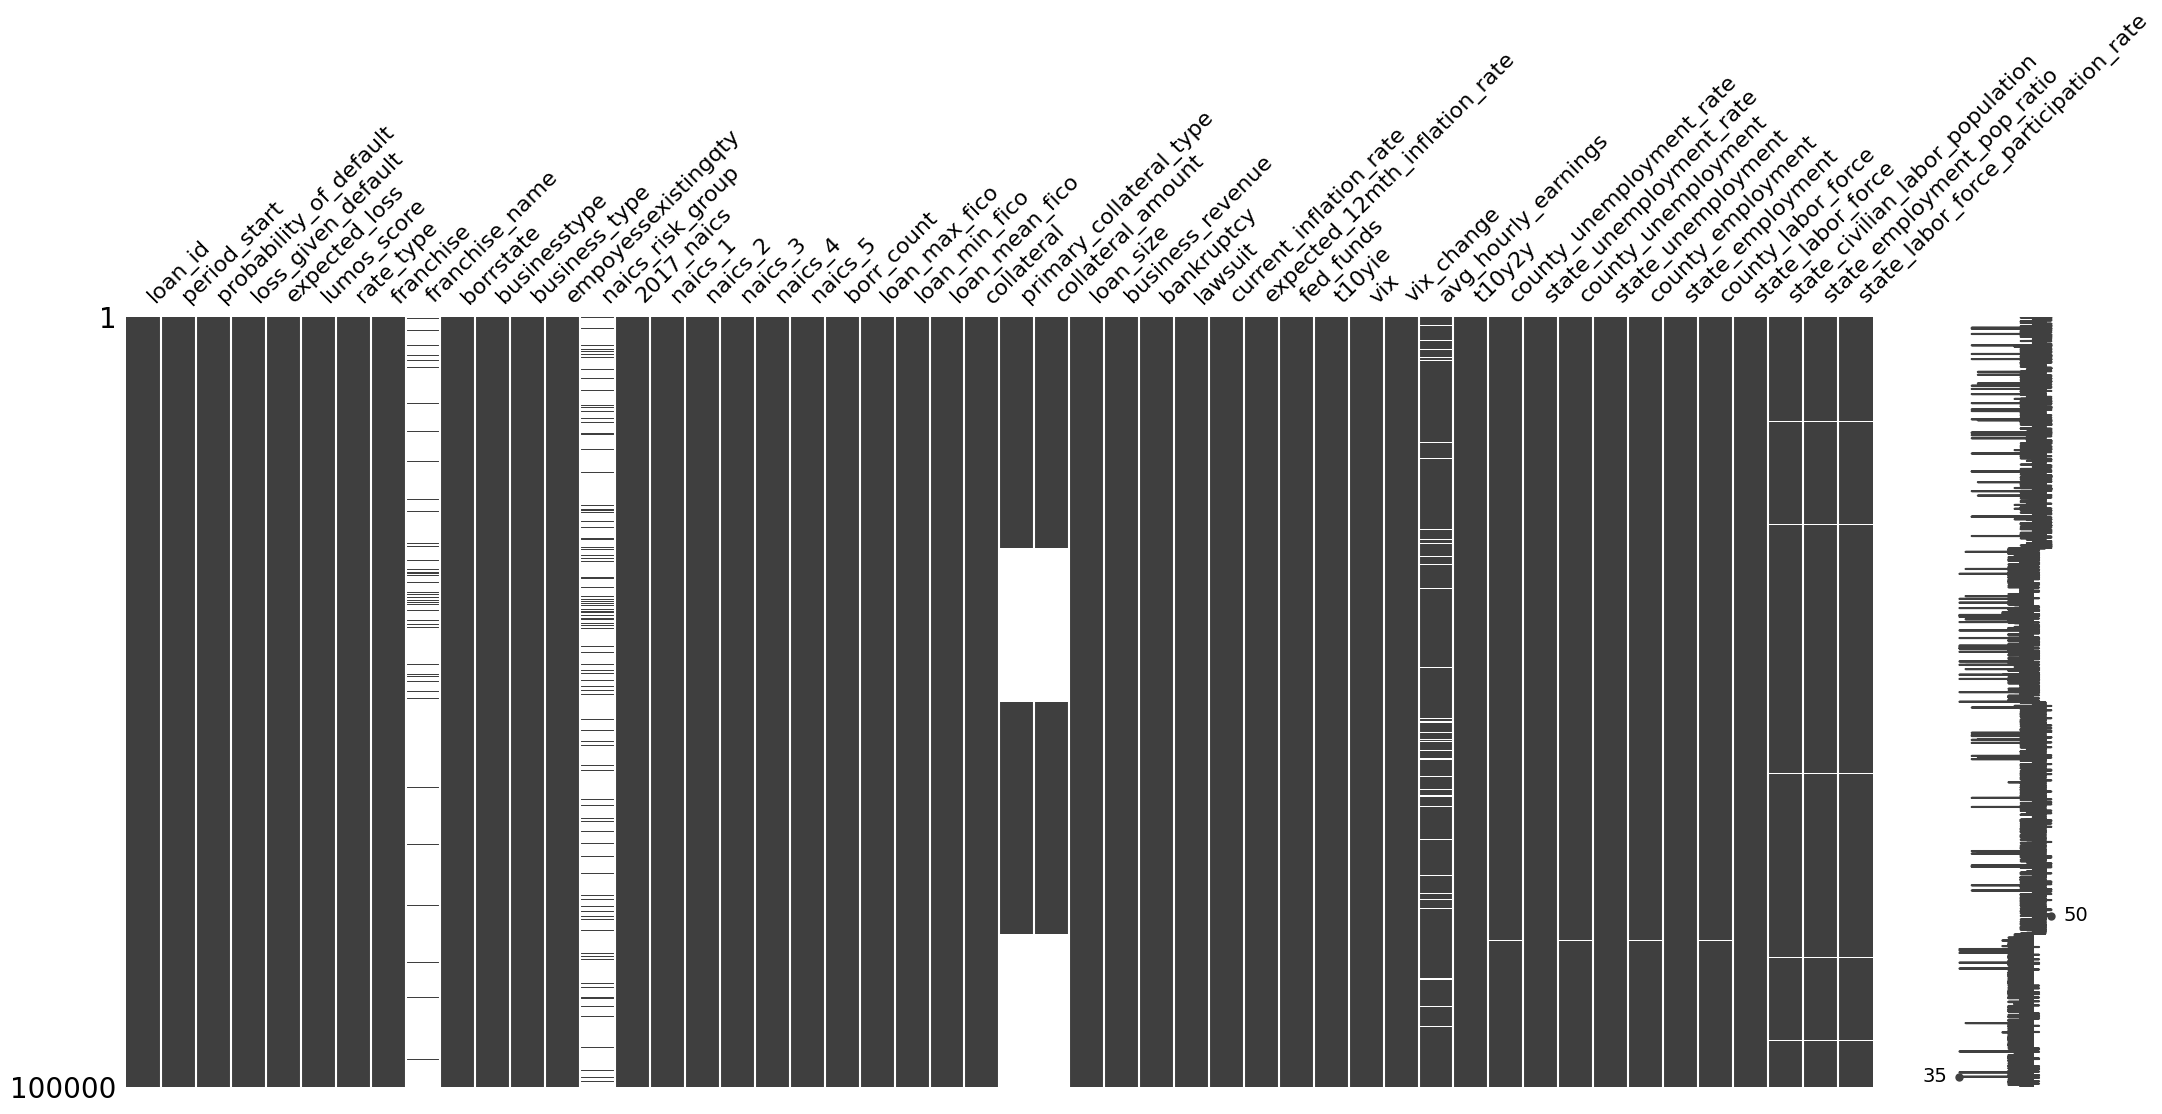

In [50]:
import missingno as msno
msno.matrix(new_copy)